In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("C:\\Users\\sz\\Desktop\\practice\\take_home_challenges")
import helper_f
%matploblib inline

UsageError: Line magic function `%matploblib` not found.


In [2]:
user = pd.read_csv("user_table.csv")
test = pd.read_csv("test_table.csv")
print("User table shape: ", user.shape)
print("test table shape: ", test.shape)

User table shape:  (452867, 4)
test table shape:  (453321, 9)


In [3]:
#check if there is any duplicates
print(user.shape[0] == len(user['user_id'].unique()))
print(test.shape[0] == len(test['user_id'].unique()))

True
True


In [4]:
display(user.head(3))

display(test.head(3))

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0


1. Need to make sure than Spain converts better than other countries
2. Need to check if test result is correct(using a t-test)
3. Need to check if date is correct

In [5]:
#join two tables 
df = user.merge(test, how = 'inner', on = 'user_id')
df.head(3)

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1


In [6]:
#check null values from each column
for col in df.columns:
    print("{} has {} percent of null values".format(col, df[col].isnull().sum()/df.shape[0]))

user_id has 0.0 percent of null values
sex has 0.0 percent of null values
age has 0.0 percent of null values
country has 0.0 percent of null values
date has 0.0 percent of null values
source has 0.0 percent of null values
device has 0.0 percent of null values
browser_language has 0.0 percent of null values
ads_channel has 0.598793906378694 percent of null values
browser has 0.0 percent of null values
conversion has 0.0 percent of null values
test has 0.0 percent of null values


## Confirm previous result 
Based on below plot, we can confirm that Spain indeed has higher conversion rate than any other Latin America countries

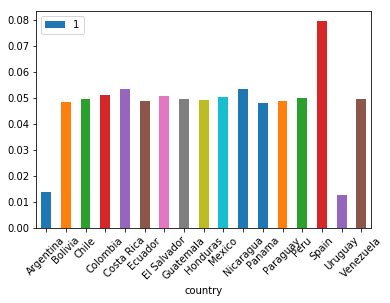

In [7]:
#plot conversion rate of countries
country_df = pd.crosstab(index= df['country'], columns = df['conversion'], normalize = 'index')
country_df.plot.bar(y = 1, rot = 45) 

# Confirm that test result is indeed negative
**Next we do a t-test to confirm that control group has higher conversion rate than experiment group. Before doing this, we need to exclude Spain population**

We can see from the result that t-score is 7.35, which is significant and indicates there is a true difference between the means of two groups. 

In [8]:
test_df = df[df.country != 'Spain']

def t_test(df,group_label, label):
    group_a = df[df[group_label] == 0][label]
    group_b = df[df[group_label] == 1][label]
    #calculate mean and std
    var_a = group_a.var(ddof = 1)
    var_b = group_b.var(ddof = 1)
    denom = np.sqrt((var_a/len(group_a)) + (var_b/len(group_b)))
    t_score = (group_a.mean() - group_b.mean()) / denom
    return t_score

print("t-test result: {}".format(t_test(test_df, 'test','conversion')))

t-test result: 7.353895203094592


In [9]:
## take a look at frequency table on the dataset with Spain population
for column in ['browser_language', 'test', 'country','date']:
    display(pd.crosstab(index=test_df[column], columns='% observations', normalize='columns'))

col_0,% observations
browser_language,
EN,0.139330
ES,0.832776
Other,0.027894


col_0,% observations
test,
0,0.462024
1,0.537976


col_0,% observations
country,
Argentina,0.116516
Bolivia,0.027735
Chile,0.049209
Colombia,0.134784
Costa Rica,0.013237
Ecuador,0.039630
El Salvador,0.020382
Guatemala,0.037710
Honduras,0.021362


col_0,% observations
date,
2015-11-30,0.156640
2015-12-01,0.156663
2015-12-02,0.155628
2015-12-03,0.219679
2015-12-04,0.311390


From below plots, we see that conversion rate varies slightly on each day. It might be because we don't have enough data, and for such experiment, we should at least run 2 weeks of experiments(5 days is too less)

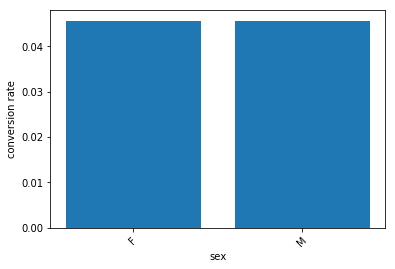

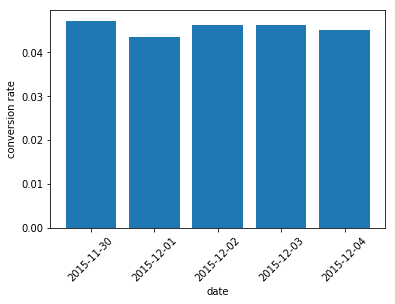

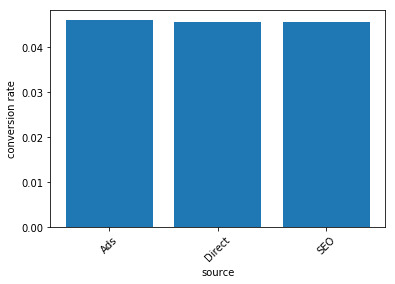

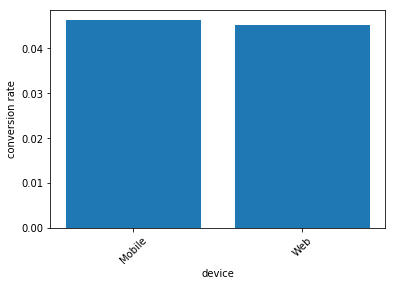

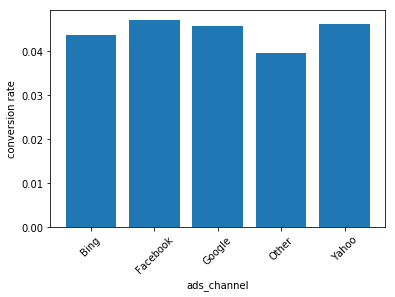

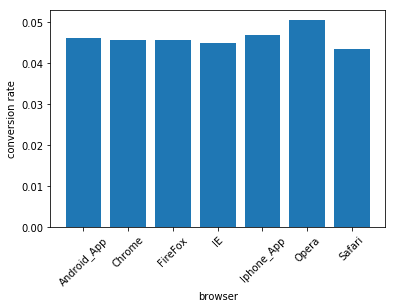

In [12]:
#plot features against conversion rate to see if there is any abonormality 
cols_to_plot = ['sex', 'date','source','device', 'ads_channel','browser']
helper_f.plot_freq(cols_to_plot, 'conversion', test_df, 'conversion rate', True)

We need to verify that the distributions of two groups are the same. 

Based on below plots, we see that two groups draw almost same distribution from each feature. However, the only problem is with _country_, where Argentina and Uraguay contain over 80% of test population

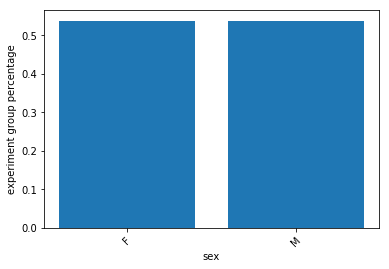

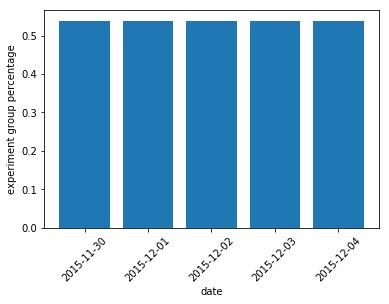

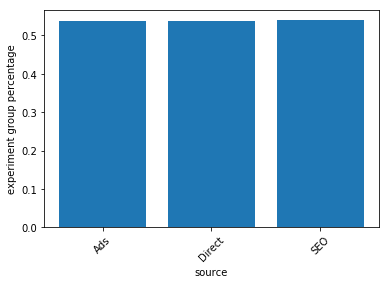

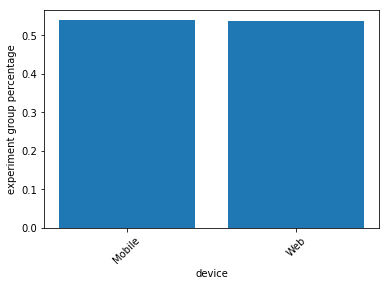

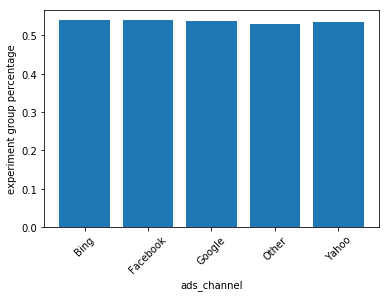

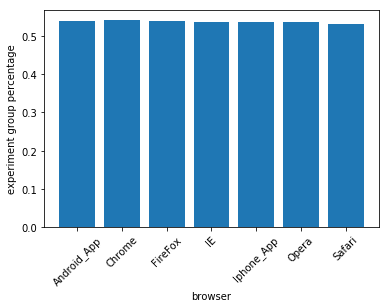

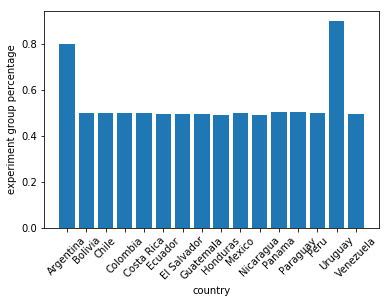

In [18]:
cols_to_plot = ['sex', 'date','source','device', 'ads_channel','browser', 'country']
helper_f.plot_freq(cols_to_plot, 'test', test_df, 'experiment group percentage', True)

age


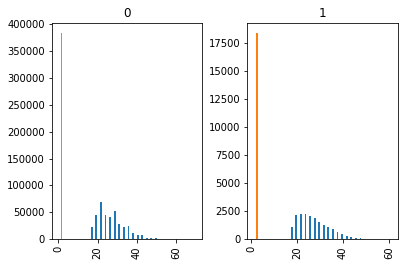

In [19]:
helper_f.plot_continuous(['age'],'conversion', test_df )

# Conclusions

1. After doing above analysis, we found that the test is actually negative because t-test score is higher than significance level
2. This happened because <br> **a**. We only have 5 days data, more data(> 2 weeks) are needed <br> **b**. The distribution of control and experiment groups are different shown by countries Argentina and Uraguay, which contain 80% of test group populations

### Now use machine learning to confirm our assumption

In [13]:
#Because ads_channel has ~ 60% of null values, we can consider remove this column
new_df = new_df.drop(['ads_channel', 'user_id'], axis = 1)

In [14]:
new_df.head(3)

,sex,age,country,date,source,device,browser_language,browser,conversion,test
0,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Android_App,0,1
1,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Safari,0,0
2,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Android_App,0,1


In [15]:
#we should also convert text to ints
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['sex','country','source','device','browser_language','browser']:
    new_df[column] = le.fit_transform(new_df[column])

In [16]:
new_df.describe()

,sex,age,country,source,device,browser_language,browser,conversion,test
count,334014.000000,334014.000000,334014.000000,334014.000000,334014.000000,334014.0,334014.000000,334014.000000,334014.000000
mean,0.583227,27.124707,7.153865,0.998344,0.554923,0.0,1.835196,0.045878,0.537696
std,0.493025,6.781171,4.591949,0.894390,0.496975,0.0,1.919332,0.209221,0.498578
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,22.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,26.000000,9.000000,1.000000,1.000000,0.0,1.000000,0.000000,1.000000
75%,1.000000,31.000000,9.000000,2.000000,1.000000,0.0,3.000000,0.000000,1.000000
max,1.000000,66.000000,15.000000,2.000000,1.000000,0.0,6.000000,1.000000,1.000000


In [17]:
new_df.head(3)

,sex,age,country,date,source,device,browser_language,browser,conversion,test
0,1,20,9,2015-12-02,0,0,0,0,0,1
1,0,27,10,2015-12-04,0,1,0,6,0,0
2,1,23,3,2015-11-30,0,0,0,0,0,1


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

new_df = new_df.drop(['date','browser_language'], axis = 1)
X,y = new_df.loc[:, new_df.columns != 'conversion'].values, new_df['conversion'].values
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
print("Accuracy: {}".format(accuracy_score(y_true = y_test, y_pred=predictions)))

confusion_matrix(y_true = y_test, y_pred = predictions)

Accuracy: 0.9508407764083628


array([[95266,   357],
       [ 4569,    13]], dtype=int64)

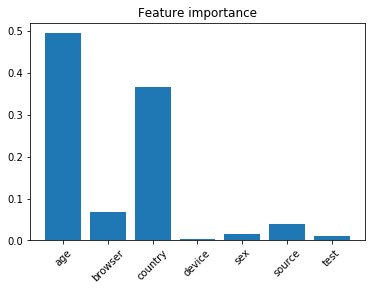

In [29]:
#check feature importance
helper_f.plot_feature_importance(new_df, 'conversion', rf, 45)

## Few things learnt

When analyzing __A/B test__ result, we need to verify following few things: <br>
1. Check result is truly significant/insigficant by using t-test and checking t-test score and p-value
2. Verify that the distribution of control and experiment groups are the same. That is they draw same distributions from every feature. This can be donw using helper_f.plot_frequency
3. Analyze if the amount of data is sufficient enough to draw any conclusions